> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. 


In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
> 1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> 2. What Group of people are most common and frequent with hospital appointments


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# load data
fh = "noshowappointments-kagglev2-may-2016.csv"
df = pd.read_csv(fh)

# inspect data
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
> 1. Check for missing data
> 2. Check for duplicates
> 3. Check for inconsistent datatypes or values
> 4. Resolve all inconsistencies found
 

In [6]:
# Checking for duplicates and missing data
print(df.shape)
print(sum(df.duplicated()))
df.isna().sum()

(110527, 14)
0


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Ambiguous Values in No-show column and can be easily misconstrued 
> The encoding of the **No-show** column is a bit confusing
   it says: _‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up_
> We can correct that and also convert it into integer based categorical values of 0s and 1s

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# changing the No-show column to 0 if patient didnt show up and 1 if he/she show
df["Show"] = [1 if x == "No" else 0 for x in df["No-show"]]
# drop the column that are not required
df.drop(columns="No-show", inplace=True)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [8]:
# Check the data type for all the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Show                int64
dtype: object

##### The following columns are not in the correct dtypes
> 1. AppointmentID, 
> 2. PatientId, 
> 3. Gender
> 4. Neighbourhood
> 3. ScheduledDay, 
> 4. AppointmentDay

In [9]:
# convert the PatientId and The AppointmentID to category
df[["PatientId", "AppointmentID", "Gender", "Neighbourhood"]] = df[["PatientId", "AppointmentID", "Gender", "Neighbourhood"]].astype("category")

df[["PatientId", "AppointmentID", "Gender", "Neighbourhood"]].describe()


,PatientId,AppointmentID,Gender,Neighbourhood
count,1.105270e+05,110527,110527,110527
unique,6.229900e+04,110527,2,81
top,8.221459e+14,5790484,F,JARDIM CAMBURI
freq,8.800000e+01,1,71840,7717


In [10]:
# convert the "AppointmentDay" and the "ScheduledDay" column to datetime dtypes
date_series = [pd.to_datetime(df[i]).dt.date for i in ["AppointmentDay", "ScheduledDay"]]
df["AppointmentDay"] = date_series[0]
df["ScheduledDay"] = date_series[1]

df[["AppointmentDay", "ScheduledDay"]].describe()


,AppointmentDay,ScheduledDay
count,110527,110527
unique,27,111
top,2016-06-06,2016-05-03
freq,4692,4238


In [11]:
# Check the statistics of other features
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


##### From the summary statistics above 
> 1. The Age column has minimum value of -1, it is not possible, it should be dropped
> 2. The show column shows that about 20% of the patient absconded


In [12]:
 df.drop(df[df["Age"] == -1].index, inplace=True)

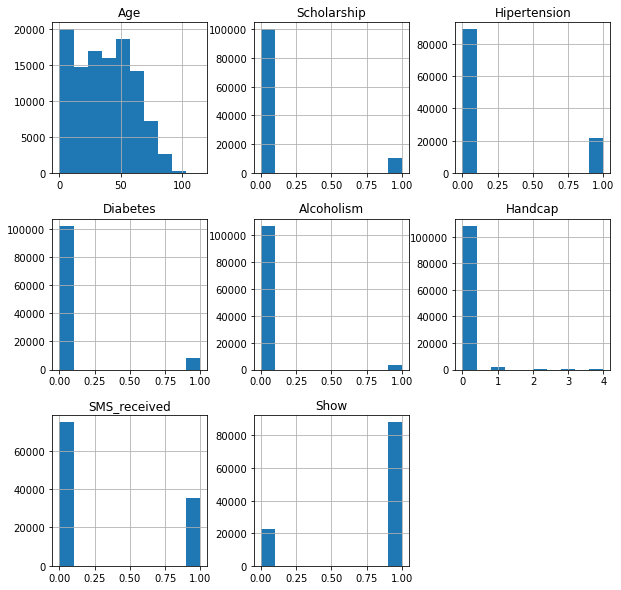

In [12]:
# General view of how all dataset features are distributed
df.hist(figsize=(10, 10));


From the above charts we can see how the dataset are distributed in all the features, majority of our features are categorical, All our continuous features are skewed

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Percentage of people who show up for their appointment

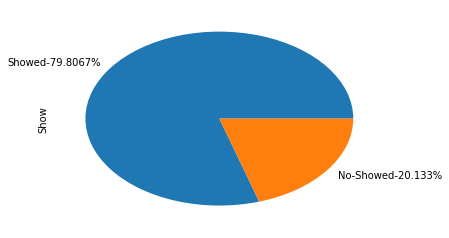

In [13]:
(df["Show"].value_counts(normalize=True)*100).plot(kind="pie", labels=["Showed-79.8067%", "No-Showed-20.133%"]);

### Investigating individual features in the dataset to check their effect on whether a patient show up or not

In [14]:
# A function to plot a bar chart of the feature relationship with show
def check_proportion(df, col1, col2, size):
    # group the dataframe based on the feature to be investigated and count its occurence
    col_counts = df.groupby([col1, "Show"]).count()[col2]
    col_totals = df.groupby(col1).count()[col2]
    
    # find the proportion of show for the column
    col_proportions = [col_counts[i] / col_totals[i] for i in col_totals.index]
    
    # convert it into a dataframe
    co = pd.DataFrame(col_proportions)
    co[col1] = col_totals.index
    co.set_index(col1, inplace=True)
    
    # find the index with highest and lowest turnout proportion
    ht, lt = (co[co[1] == co[1].max()], co[co[1] == co[1].min()])
    print(f"The {col1} with the lowest turnout proportion is {lt.index}")
    print(f"The {col1} with the highest turnout proportion is {ht.index}")
    
    # plot the proportions bar chart
    co[[1]].plot(kind="bar", figsize=size)

#### PatientId
1. How many patient have apointment with the hospital; uniq_pat_count
2. Who is the most frequent patient; freq_pat_id
3. How many patient have more than one appointment with the hospital; more_than_1
4. How is general patient reaction to the hospital invite; pie plot

In [15]:
# The number of unique patients
# The most frequent patient
df["PatientId"].describe()

count     1.105260e+05
unique    6.229800e+04
top       8.221459e+14
freq      8.800000e+01
Name: PatientId, dtype: float64

#### Investigate patient with one appointment and patient with more than one appointment

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Patients who have only one appointment
uniq_pat = df.drop_duplicates(subset="PatientId", keep=False)
print(f"Patient with only one appointment: {len(uniq_pat)}")
# uniq_pat[["PatientId", "Show"]].value_counts()

# Patients with more than one appointment
rep_pat = df[df.duplicated(subset="PatientId", keep=False)]

# How many patient have more than one appointment with the hospital
more_than_1 = rep_pat["PatientId"].value_counts().sort_index()
print(f"Patient with more than one appointments: {len(more_than_1)}")



Patient with only one appointment: 37919
Patient with more than one appointments: 62299


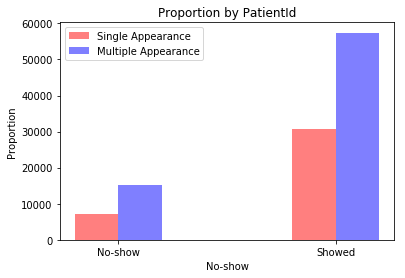

In [18]:
ind = np.array([0, 1])
width = 0.2

uniq_bars = plt.bar(ind, uniq_pat.groupby("Show").count()["PatientId"], width, color='r', alpha=.5, label='Single Appearance')
freq_bars = plt.bar(ind+width, rep_pat.groupby(["Show"]).count()["PatientId"], width, color='b', alpha=.5, label='Multiple Appearance')

plt.ylabel('Proportion')
plt.xlabel('No-show')
plt.title('Proportion by PatientId')
locations = ind + width / 2  # xtick locations
labels = ['No-show', 'Showed']  # xtick labels
plt.xticks(locations, labels)

plt.legend();


## AppointmentID

1. This is particular to each appointment, it will not affect the dataset, I think it should be dropped

In [19]:
df["AppointmentID"].value_counts().sort_values()


5775010    0
5790461    1
5790452    1
5790447    1
5790434    1
5790416    1
5790377    1
5790376    1
5790372    1
5790370    1
5790369    1
5790464    1
5790367    1
5790362    1
5790358    1
5790355    1
5790352    1
5790351    1
5790330    1
5790322    1
5790319    1
5790292    1
5790284    1
5790364    1
5790466    1
5790287    1
5790275    1
5790236    1
5790233    1
5790232    1
          ..
5140090    1
5156427    1
5156433    1
5140100    1
5156441    1
5140065    1
5139864    1
5139859    1
5139857    1
5139853    1
5139848    1
5139839    1
5139834    1
5139832    1
5139831    1
5139826    1
5134249    1
5134243    1
5134239    1
5134233    1
5134228    1
5134227    1
5134224    1
5134223    1
5134220    1
5134197    1
5122866    1
5140074    1
5140081    1
5680573    1
Name: AppointmentID, Length: 110527, dtype: int64

## Gender
1. How many female and male are sampled
2. How men and women react to hospital appointments

The Gender with the lowest turnout proportion is CategoricalIndex(['F'], categories=['F', 'M'], ordered=False, name='Gender', dtype='category')
The Gender with the highest turnout proportion is CategoricalIndex(['M'], categories=['F', 'M'], ordered=False, name='Gender', dtype='category')


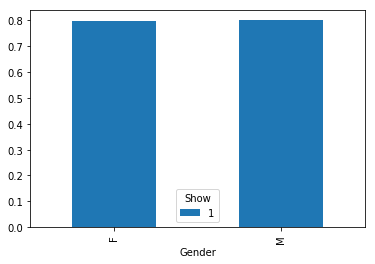

In [20]:
check_proportion(df, "Gender", "SMS_received", None)

## ScheduledDay
Questions:
1. What day has highest schedule, how many turned up

I think this column should be dropped because:
1.  The day an appointment was scheduled would not have any effect on whether someone show for an event or not
2.  The appointment are scheduled on a vast range of days that would be suggesting how particular they are to the patient

Series([], Name: SMS_received, dtype: int64)

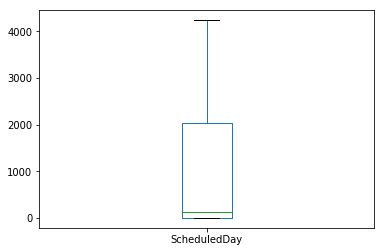

In [21]:
schedule = df["ScheduledDay"].value_counts()
schedule
schedule.plot(kind="box");

highest_schedule = df[df["ScheduledDay"] == "2016-05-06T07:09:54Z"]
highest_schedule.groupby("Show").count()["SMS_received"]


## AppointmentDay

1. How many days were appointed
2. How people performed on various days
3. The day with the lowest turnout
4. The day with the lowest appointment

The AppointmentDay with the lowest turnout proportion is Index([2016-05-20], dtype='object', name='AppointmentDay')
The AppointmentDay with the highest turnout proportion is Index([2016-06-08], dtype='object', name='AppointmentDay')


2016-06-06    4691
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64

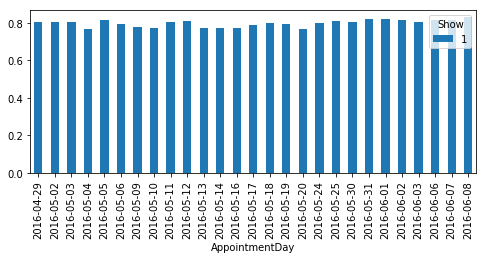

In [22]:
appointment = df["AppointmentDay"].value_counts()
#appointment.nunique()
check_proportion(df, "AppointmentDay", "SMS_received", (8,3))
appointment

##	Age

Age of - 1 is likely to be an error, it should be dropped.

There are ages with 100 % turn up in all their appointments which are ages 99 100 102

Age 0 has the highest encounter with the hospital


The Age with the lowest turnout proportion is Int64Index([115], dtype='int64', name='Age')
The Age with the highest turnout proportion is Int64Index([99, 100, 102], dtype='int64', name='Age')
99        1
102       2
100       4
115       5
98        6
97       11
96       17
95       24
94       33
93       53
91       66
92       86
90      109
88      126
89      173
87      184
86      260
85      275
83      280
84      311
79      390
82      392
81      434
80      511
77      527
78      541
75      544
76      571
74      602
72      615
       ... 
45     1453
46     1460
58     1469
18     1487
44     1487
5      1489
32     1505
17     1509
3      1513
6      1521
30     1521
33     1524
34     1526
54     1530
37     1533
39     1536
19     1545
51     1567
36     1580
57     1603
50     1613
2      1618
59     1624
38     1629
56     1635
53     1651
49     1652
52     1746
1      2273
0      3539
Name: Age, Length: 103, dtype: int64


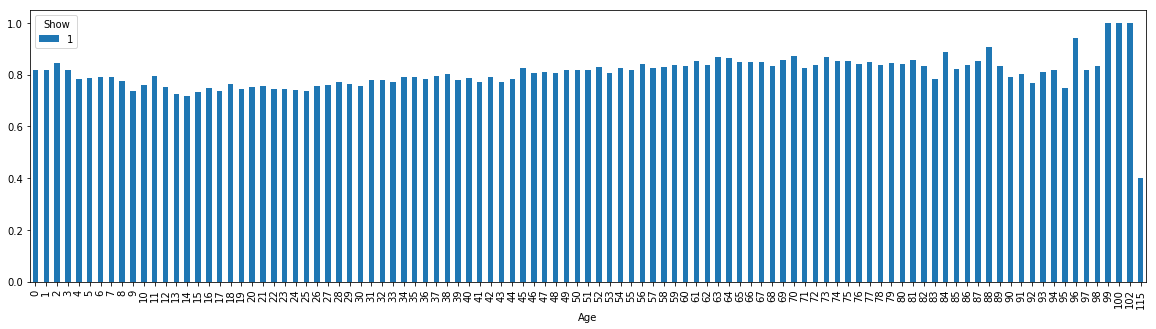

In [23]:
check_proportion(df, "Age", "SMS_received", (20,5))
age_df = df["Age"].value_counts().sort_values()
print(age_df)


## Neighbourhood

1. What neighbourhood is most common
2. What neighbourhood has highest turnout proportion

count             110526
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object
The Neighbourhood with the lowest turnout proportion is CategoricalIndex(['SANTOS DUMONT'], categories=['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', ...], ordered=False, name='Neighbourhood', dtype='category')
The Neighbourhood with the highest turnout proportion is CategoricalIndex(['PARQUE INDUSTRIAL'], categories=['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', ...], ordered=False, name='Neighbourhood', dtype='category')


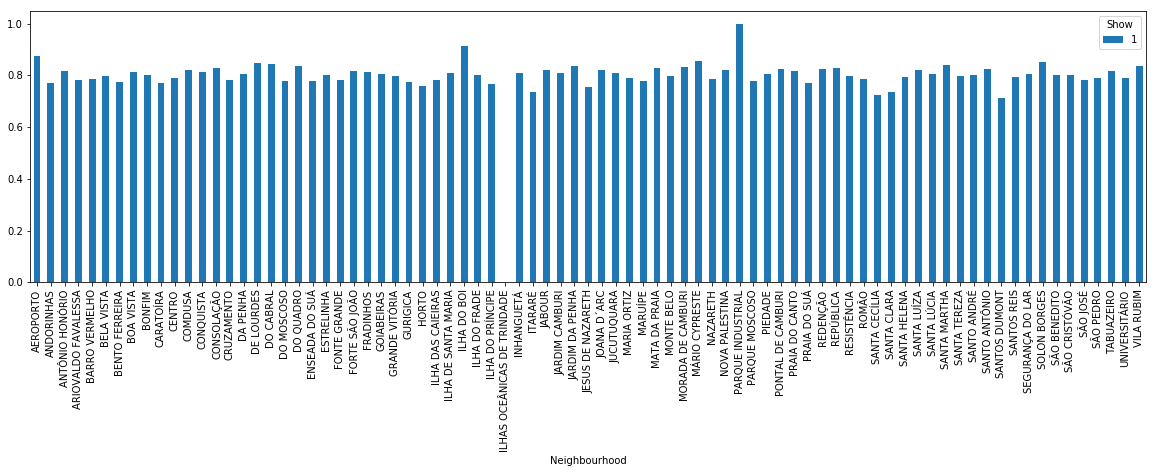

In [24]:
df["Neighbourhood"] = df["Neighbourhood"].astype('category')
print(df["Neighbourhood"].describe())

check_proportion(df, "Neighbourhood", "SMS_received", (20, 5))
#df["Neighbourhood"].value_counts()

## Scholarship

1. How many people are enrolled in the Bolsa Familia
2. Performance of people that enroll versus people who didn't enroll

The Scholarship with the lowest turnout proportion is Int64Index([1], dtype='int64', name='Scholarship')
The Scholarship with the highest turnout proportion is Int64Index([0], dtype='int64', name='Scholarship')


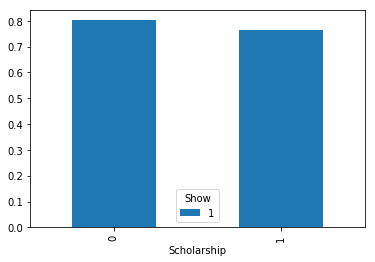

In [25]:
check_proportion(df, "Scholarship", "SMS_received", None)

## Diabetes

1. How many people have diabetes
2. Performance of people that have diabetes versus those that doesn't have

The Scholarship with the lowest turnout proportion is Int64Index([1], dtype='int64', name='Scholarship')
The Scholarship with the highest turnout proportion is Int64Index([0], dtype='int64', name='Scholarship')


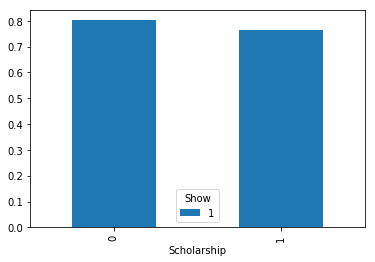

In [26]:
check_proportion(df, "Scholarship", "SMS_received", None)


## Alcoholism

1. How many people are alcoholics
2. Performance of people that are alcoholic and people that aren't

The Alcoholism with the lowest turnout proportion is Int64Index([0], dtype='int64', name='Alcoholism')
The Alcoholism with the highest turnout proportion is Int64Index([1], dtype='int64', name='Alcoholism')


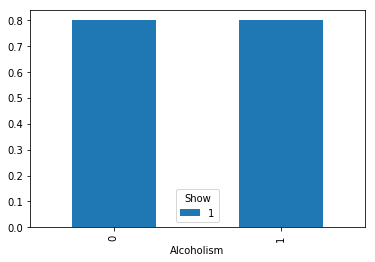

In [27]:
check_proportion(df, "Alcoholism", "SMS_received", None)

## Handcap


The Handcap with the lowest turnout proportion is Int64Index([4], dtype='int64', name='Handcap')
The Handcap with the highest turnout proportion is Int64Index([1], dtype='int64', name='Handcap')


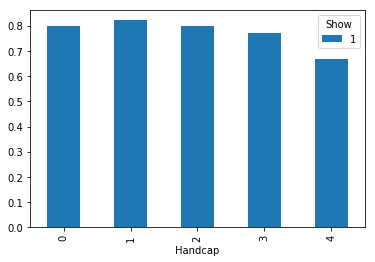

In [28]:
check_proportion(df, "Handcap", "SMS_received", None)

## SMS_received

> People who received SMS didnt turn out well compared to those who didn't receive. It could indicate a break in transmission, and the effectiveness of the SMS or the SMS are received late

The SMS_received with the lowest turnout proportion is Int64Index([1], dtype='int64', name='SMS_received')
The SMS_received with the highest turnout proportion is Int64Index([0], dtype='int64', name='SMS_received')


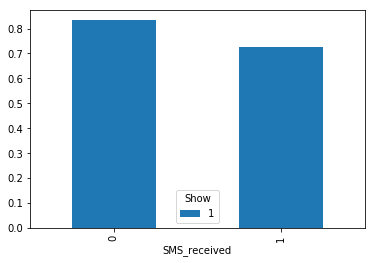

In [29]:
check_proportion(df, "SMS_received", "AppointmentID", None)

<a id='conclusions'></a>
## Conclusions

1. It is very likely for a man to show compare to a woman. 
2. Some patients have more than one appointment and they fail to show up in all the appointments they will probably not show up even if there is another appointment in the future but most patient with only one hospital appointment are more likely to show up
3. The ScheduledDay with highest schedule is 2016-05-06T07:09:54Z with 24 appointment scheduled and only 9 of the patients showed while Majority of days have only one schedule each
4. AppointmentDays with high and low turnout proportions can tell us the likelyhood of a patient showing up if appointed on that day
5. There are ages with 100% turnup and they are more than one occurence moreso age 0 have the largest appointment/encounters with the hospital
6. Alcoholics tend to turn out more than non-alcoholics
7. It seems there is error in the SMS sent, may be the patients left a wrong contact address, further investigation to this may solve this issue
8. Diabetes Patient also didn't turnout well compare to the non-diabetes patient, maybe they already started having difficulty in walking further investigation could shed light on this

## Limitations
1. The dataset have more women than men (the range is very wide) ; this may affect the accuracy of this investigation if many men who fail to show up were incorporated into the dataset

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

### References

1. https://www.geeksforgeeks.org/how-to-drop-rows-in-pandas-dataframe-by-index-labels/
2. https://stackoverflow.com/questions/71369078/init-got-an-unexpected-keyword-argument-max-rows
3. https://stackoverflow.com/questions/15723628/pandas-make-a-column-dtype-object-or-factor
4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
5. https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000/modules/a8411eaf-1cfb-40f1-a8e7-9678bf06e83d/lessons/ls0522/concepts/98537dba-a3d9-4591-a8fe-b19ae7f02c77
6. https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000/modules/a8411eaf-1cfb-40f1-a8e7-9678bf06e83d/lessons/ls0523/concepts/ff1cb6ad-8cef-451c-aa0a-8dbc1e8ed975